# Plot model fit comparisons for PEERS data

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mindstorm import statplot
from cfr import framework
from cfr import figures
from cfr import reports

fit_dir = Path(os.environ['PEERS_FITS'])
fig_dir = Path(os.environ['PEERS_FIGURES']) / 'sim1'

os.makedirs(fig_dir, exist_ok=True)
figures.set_style()
%matplotlib inline

## Load model fits

In [2]:
models, model_names = framework.get_sim_models('peers', 'set2')
all_models, all_model_names = framework.get_sim_models('peers', 'set1')

xval = framework.read_model_xvals(fit_dir, all_models, all_model_names)
xval.groupby('model')['logl_test_list'].mean().sort_values()

model
D       -23.307242
I       -21.962667
ID      -21.621330
ED-RD   -21.608065
ED      -21.607345
I-D     -21.507783
RD      -21.457658
UR      -21.447858
Name: logl_test_list, dtype: float64

## Plot model cross-validation performance

LINO NOT subset; don't know how to subset; dropped


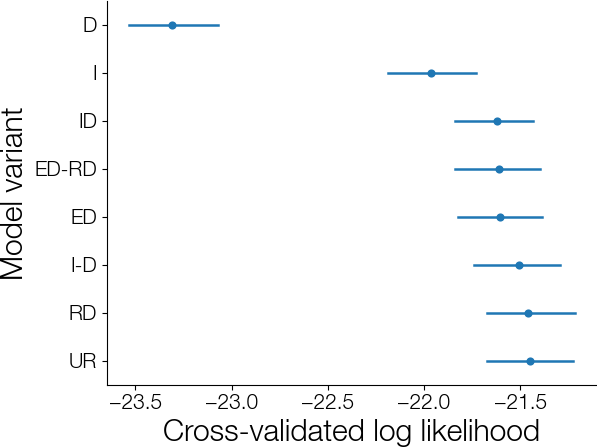

In [3]:
g = figures.plot_xval_comp(xval, aspect=1.3, height=5)
g.savefig(fig_dir / 'model_comp_xval_full.pdf')
None

LINO NOT subset; don't know how to subset; dropped


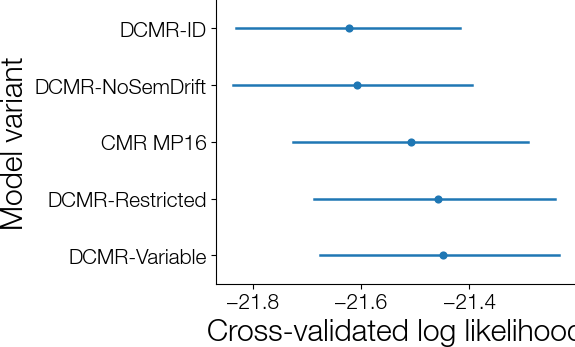

In [4]:
xval = framework.read_model_xvals(fit_dir, models, model_names)
g = figures.plot_xval_comp(xval, aspect=1.57, height=4)
g.savefig(fig_dir / 'model_comp_xval.pdf')
None

## Plot best-fitting B parameters by sublayer

In [5]:
dark = sns.color_palette(
    'ch:start=.85, rot=3, light=.7, dark=.3, gamma=1, hue=.5'
)
dark

[(0.7677146868667069, 0.6832898635343498, 0.6227761667322436),
 (0.6959582116380986, 0.5671977683716981, 0.6924893105708751),
 (0.47235755336184604, 0.5571347744376278, 0.6432698130407366),
 (0.3704097010205724, 0.5160382140138384, 0.3930721515650498),
 (0.4361604889403601, 0.3713168195808429, 0.2769734554622078),
 (0.3783407100721391, 0.24873886348747545, 0.3434653432968093)]

In [6]:
light = sns.color_palette(
    'ch:start=.85, rot=3, light=.7, dark=.3, gamma=.5, hue=1'
)
light

[(0.9232372258488759, 0.8135797718989244, 0.7349799281741104),
 (0.8956995853139128, 0.7126399553756866, 0.8907678242112859),
 (0.6278498977346862, 0.7606438582851401, 0.8955646869361347),
 (0.5217328362665021, 0.7780784894888304, 0.5616248915311974),
 (0.728614677102655, 0.5985568760668512, 0.4093311490099824),
 (0.7362245945415111, 0.42909989546413796, 0.6535784995332191)]

In [7]:
ur_model = all_models[all_model_names.index("UR")]
fit = framework.read_model_fits(fit_dir, [ur_model], ["UR"])
B_names = [
    'B_enc_loc',
    'B_enc_use',
    'B_rec_loc',
    'B_rec_use',
]
B_subset = pd.melt(
    fit[B_names].reset_index(),
    id_vars='subject', 
    value_vars=B_names,
    var_name='parameter',
    value_name='value',
)
fit[B_names].reset_index()

,model,subject,B_enc_loc,B_enc_use,B_rec_loc,B_rec_use
0,UR,63,0.161458,0.398439,0.151117,0.965598
1,UR,64,0.418340,0.098871,0.986963,0.000000
2,UR,65,0.616990,0.000023,0.663978,0.999999
3,UR,66,0.183546,0.693147,0.475536,1.000000
4,UR,67,0.161852,0.795624,0.692362,0.907553
...,...,...,...,...,...,...
121,UR,240,0.594563,0.353742,0.715447,0.960705
122,UR,241,0.147139,0.535408,0.636222,0.999976
123,UR,242,0.141236,0.766888,0.541850,1.000000
124,UR,243,0.056520,0.517882,0.126780,0.703489


/Users/nmorton/PycharmProjects/mindstorm/src/mindstorm/statplot.py:188: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.stripplot(data=data, x=x, y=y, hue=hue, ax=ax, **point_prop, **kwargs)
/Users/nmorton/PycharmProjects/mindstorm/src/mindstorm/statplot.py:203: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=data, x=x, y=y, hue=hue, ax=ax, **bar_prop, **kwargs)
LINO NOT subset; don't know how to subset; dropped


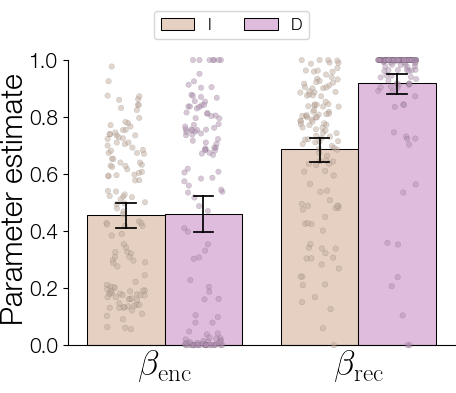

In [8]:
B_labels = [
    r'$\beta_\mathrm{enc}^{I}$',
    r'$\beta_\mathrm{enc}^{D}$',
    r'$\beta_\mathrm{rec}^{I}$',
    r'$\beta_\mathrm{rec}^{D}$',
]
B_subset['phase'] = B_subset['parameter'].map(
    {
        'B_enc_loc': 'enc',
        'B_enc_use': 'enc',
        'B_rec_loc': 'rec',
        'B_rec_use': 'rec',
    }
)
B_subset['sublayer'] = B_subset['parameter'].map(
    {
        'B_enc_loc': 'I',
        'B_enc_use': 'D',
        'B_rec_loc': 'I',
        'B_rec_use': 'D',
    }
)
fig, ax = plt.subplots(figsize=(5, 4))
statplot.plot_swarm_bar(
    B_subset,
    x='phase',
    y='value',
    hue='sublayer',
    point_kind='strip',
    light=light,
    dark=dark,
    dodge=True,
    bar_kws={'capsize': 0.2, 'clip_on': False},
    point_kws={'size': 4, 'alpha': 0.5, 'jitter': 0.2},
    legend=False,
    ax=ax,
)
ax.set(ylim=(0, 1), ylabel='Parameter estimate')
ax.set_xticks(
    [0, 1], 
    [r'$\beta_\mathrm{enc}$', r'$\beta_\mathrm{rec}$'], 
    usetex=True, 
    fontfamily='helvetica',
    fontsize='x-large',
)
ax.tick_params(axis='x', length=0)
ax.set(ylim=(0, 1.08), yticks=np.arange(0, 1.2, 0.2))
ax.spines['left'].set_bounds(0, 1)
fig.legend(loc=(.3375, .9), prop={'size': 12}, ncol=3)
ax.yaxis.set_label_coords(-.1, 0.475)
fig.savefig(fig_dir / 'param_B.pdf')

## Create parameter tables

In [9]:
table = reports.create_model_table(fit_dir, all_models, all_model_names, model_comp='xval')
table.to_latex(fig_dir / 'parameters_full.tex', escape=False)
table

,I,D,ID,UR,ED,RD,ED-RD,I-D
$L_{FC}$,0.26 (0.01),0.48 (0.01),0.22 (0.00),0.40 (0.01),0.28 (0.01),0.38 (0.01),0.27 (0.01),0.26 (0.01)
$L_{CF}$,0.39 (0.01),0.74 (0.01),0.33 (0.01),0.59 (0.01),0.40 (0.01),0.57 (0.01),0.40 (0.01),0.38 (0.01)
$D_{FF}$,---,---,---,---,---,---,---,0.20 (0.00)
$\phi_s$,0.48 (0.03),0.65 (0.01),0.20 (0.00),0.17 (0.00),0.15 (0.00),0.18 (0.00),0.16 (0.00),0.49 (0.03)
$\phi_d$,0.92 (0.03),0.72 (0.02),1.00 (0.03),0.89 (0.03),0.88 (0.03),0.87 (0.03),0.90 (0.04),0.89 (0.03)
$\beta_{\mathrm{enc}}$,0.53 (0.01),0.29 (0.01),0.54 (0.01),---,---,---,---,0.52 (0.01)
"$\beta_{\mathrm{enc},I}$",---,---,---,0.46 (0.01),0.59 (0.01),0.47 (0.01),0.59 (0.01),---
"$\beta_{\mathrm{enc},D}$",---,---,---,0.43 (0.01),1,0.42 (0.01),1,---
$\beta_{\mathrm{start}}$,0.41 (0.01),0.11 (0.01),0.45 (0.01),0.27 (0.01),0.59 (0.01),0.28 (0.01),0.59 (0.01),0.40 (0.01)
$\beta_{\mathrm{rec}}$,0.80 (0.00),0.67 (0.01),0.84 (0.00),---,---,---,---,0.79 (0.00)


In [10]:
table = reports.create_model_table(fit_dir, models, model_names, model_comp='xval')
table.to_latex(fig_dir / 'parameters_peers.tex', escape=False)
table

,DCMR-ID,DCMR-Variable,DCMR-Restricted,DCMR-NoSemDrift,CMR MP16
$L_{FC}$,0.22 (0.00),0.40 (0.01),0.38 (0.01),0.27 (0.01),0.26 (0.01)
$L_{CF}$,0.33 (0.01),0.59 (0.01),0.57 (0.01),0.40 (0.01),0.38 (0.01)
$D_{FF}$,---,---,---,---,0.20 (0.00)
$\phi_s$,0.20 (0.00),0.17 (0.00),0.18 (0.00),0.16 (0.00),0.49 (0.03)
$\phi_d$,1.00 (0.03),0.89 (0.03),0.87 (0.03),0.90 (0.04),0.89 (0.03)
$\beta_{\mathrm{enc}}$,0.54 (0.01),---,---,---,0.52 (0.01)
"$\beta_{\mathrm{enc},I}$",---,0.46 (0.01),0.47 (0.01),0.59 (0.01),---
"$\beta_{\mathrm{enc},D}$",---,0.43 (0.01),0.42 (0.01),1,---
$\beta_{\mathrm{start}}$,0.45 (0.01),0.27 (0.01),0.28 (0.01),0.59 (0.01),0.40 (0.01)
$\beta_{\mathrm{rec}}$,0.84 (0.00),---,---,---,0.79 (0.00)


In [11]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.10.13
IPython version      : 8.16.1

seaborn   : 0.13.0
mindstorm : 0.11.1
numpy     : 1.26.1
pandas    : 2.1.2
matplotlib: 3.8.0
cfr       : 0.1.0

